### Домашняя работа

### Задача 1
#### Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 6. 
#### Подсказка: оценкой вероятности может служить, например, относительная частота при большом числе опытов. Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и/или ваше терпение. 
#### Замечание: вообще в этом курсе мы не используем такие численные методы оценки вероятностей, и в будущем мы не будем их применять. Но тут сделаем исключение один раз.

#### Относительная частота — это отношение количества состоявшихся событий к общему числу испытаний:

$$W(A) = \frac{m}{n}$$

#### Смоделируем 60-кратное подбрасывание каждой из 3-х  игральной кости с помощью функции random.randint пакета numpy, то есть  𝑛  = 60. И просуммируем их значения

In [1]:
import numpy as np


In [2]:
n = 60
a = np.random.randint(1, 7, size=n)
b = np.random.randint(1, 7, size=n)
c = np.random.randint(1, 7, size=n)
a+b+c

array([14,  8,  8, 10, 16, 14, 13, 15, 10, 10, 14, 16, 13,  6, 12,  9,  8,
       12,  7, 10, 10, 12,  9,  9,  7,  8, 11, 15, 13,  8,  9, 14, 11,  9,
       13,  6, 12, 13, 17, 11, 10,  4, 13, 14, 13,  8,  8, 16,  9, 11,  7,
       10,  9,  8, 13,  9,  6,  9,  7,  9])

#### Вычислим мощность подмножества, где в результате испытания выпадало сумма меньше или равная 6, то есть наблюдалось событие $A$:

In [3]:
a+b+c <= 6

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [4]:
m = (a+b+c <= 6).sum()

In [5]:
m

4

#### Теперь можем вычислить относительную частоту события $A$:

In [6]:
W = m / n
print(W)

0.06666666666666667


#### Смоделируем ситуацию на большем количестве события

In [10]:
def frequency(n:int) -> float:
    a = np.random.randint(1, 7, size=n)
    b = np.random.randint(1, 7, size=n)
    c = np.random.randint(1, 7, size=n)
    m = (a+b+c <= 6).sum()
    return m/n

In [11]:
from matplotlib import pyplot as plt
from tqdm import trange

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

100%|████████████████████████████| 100/100 [07:02<00:00,  4.22s/it]


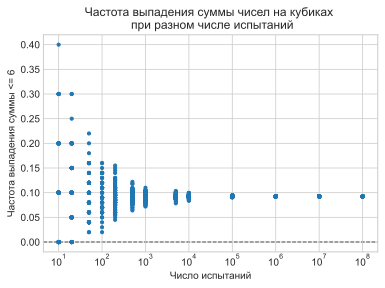

In [35]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8]

x = []
y = []

for _ in trange(100):
    for n in ns:
        x.append(n)
        y.append(frequency(n))
        
plt.scatter(x, y, s=10)

plt.axhline(y = m/n, c = 'black', ls = 'dashed', lw = 1).set_zorder(0)
plt.xscale('log')

plt.title('Частота выпадения суммы чисел на кубиках \n при разном числе испытаний')
plt.xlabel('Число испытаний')
plt.ylabel('Частота выпадения суммы <= 6')

plt.show()

### Задача 2

#### Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

In [14]:
from math import factorial

In [18]:
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

#### Выбираем один туз из четырех

In [20]:
combinations(4, 1)

4

#### Остальные три карты выбираются из 51 карты  — туз не рассматривается, так как он уже выбран:

In [21]:
combinations(51, 3)

20825

#### Количество сочетаний по условию задачи равно:

In [22]:
4 * 20825


83300

### Задача 3

#### Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Случайным образом студент вытягивает 3 вопроса. Какова вероятность, что все выбранные вопросы знакомы студенту? Какова вероятность, что студент знает 2 вопроса из 3?

#### В данной задаче не совсем понял: Либо необходимо найти 3 вопроса из 50? Тогда:

In [27]:
combinations(50, 3)

19600

#### Либо необходимо найти разницу между сочетанием 3 из 60 и 3 из 50? Тогда:

In [28]:
combinations(60, 3) - combinations(50, 3)

14620

#### Либо необходимо найти количество сочетаний 3 из 10? Тогда:

In [32]:
combinations(10, 3)

120

#### Вероятность 2 вопросов из 3

#### Число сочетаний

In [29]:
combinations(3, 2)

3

#### Оставшийся один вопрос выбирается из 58 билетов

In [30]:
combinations(58, 1)

58

#### Число сочетаний будет равно

In [31]:
3*58

174

### Задача 4

#### Бросается игральная кость. Пусть событие A - появление чётного числа, событие B - появление числа больше трёх. Являются ли эти события независимыми? Почему?

#### Сначала рассмотрим вероятность выпадения четного числа на игральной кости. Таких случаев может быть три: это события, при которых выпадают числа 2, 4 и 6. Вероятность для каждого из них равна 1/6.

#### Так как эти три события являются несовместными, вероятность их суммы равна сумме их вероятностей:

In [33]:
1/6 + 1/6 + 1/6 

0.5

#### Вероятность появления числа больше трех. Т.е. это выпадение чисел 4 или 5 или 6. Вероятность для каждого из них также равна 1/6

#### Так как эти три события являются несовместными, вероятность их суммы равна сумме их вероятностей:

In [34]:
1/6 + 1/6 + 1/6

0.5

#### Эти события являются зависимыми т.к. событие А влияет на событие В. При выпадении чисел 4 и 6 выполняются оба условия: это и четные числа и они больше 3

### Задача 5

#### Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ. Какова вероятность, что вы действительно больны ей?

#### Подсказка: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.

#### Прежде чем узнали результат теста, мы располагали только априорной вероятностью того, что имеется редкая болезнь, и она равнялась 0.1% — если учесть, что у всех людей были равные возможности заболеть.

#### Зная результат теста, мы можем заново оценить вероятности точности  — ведь точность теста не 100%. 

$$P(A\:|\:B_1) = 0.01$$

$$P(A\:|\:B_2) = 0.99$$


#### Вероятность того, я действительно болен — будем находить по формуле:

$$P(B_2\:|\:A) = \frac{P(B_2) \cdot P(A\:|\:B_2)}{P(A)}$$

#### Все величины подставим из условия, а знаменатель дроби распишем по формуле полной вероятности:

$$P(B_2\:|\:A) = \frac{\frac{0.1}{100} \cdot 0.99}{\frac{0.1}{100} \cdot 0.01 + \frac{0.1}{100} \cdot 0.99}$$

In [36]:
(0.1/100*0.99)/(0.1*0.01 + 0.1/100*0.99)

0.49748743718592964